In [22]:
import numpy as np
import scipy.linalg

Can you design a suitable diagonal matrix $D^k$
for gradient descent algorithm with scaling to solve $min_x$ q(x).
If you can come up with a suitable choice of $D^k$
, use it in the implementation of Algorithm 1 (with backtracking
line search) to find the minimizer of q(x) with starting point $x_0$ = (8, 8) and τ = 10−5
. Consider $\alpha_0$ = 1, ρ =
0.5, γ = 0.5 for backtracking line search. Comment on your observations when compared to the gradient descent
(without scaling) with backtracking line search. If you cannot find a suitable choice of Dk
, explain clearly the
reasons.

##Question number 2.1

we can get $D^k$ as diag  $[(\frac{\delta^2f}{\delta x_1^2})^{-1},(\frac{\delta^2f}{\delta x_2^2})^{-1} , (\frac{\delta^2f}{\delta x_3^2})^{-1}, ...............(\frac{\delta^2f}{\delta x_n^2})^{-1}]$

for our question 
$D^k=$
$\begin{bmatrix}
(2+6144*x_1^2-2048*x_2)^{-1} & 0\\
0 & (1024)^{-1}
\end{bmatrix}$

refrence Nonlinear Programming,Dimitri P. Bertsekas

hessian matrix can be written as $\nabla^2 f= 
\begin{bmatrix}
(2+6144*x_1^2-2048*x_2) & -2048*x_1\\
-2048*x_1 & 1024
\end{bmatrix}$

In [23]:
def evalf(x):
  r=0
  r=np.float64(r)
  r=512*((x[1]-(x[0]**2))**2) + (4-x[0])**2
  return r

In [24]:
def evalg(x):
  return np.array([-2048*x[0]*(x[1]-(x[0]**2))-2*(4-x[0]),1024*(x[1]-(x[0]**2))],dtype='float64')

In [25]:
def evalh(x):
  return np.array([[2+6144*(x[0]**2)-2048*x[1],-2048*x[0]],[-2048*x[0],1024]],dtype='float64')

In [26]:
def d_k_diag(x):
  return np.array([[1/(2+6144*(x[0]**2)-2048*x[1]),0],[0,1/(1024)]],dtype='float64')

In [27]:
def d_k_newton(x):
  r=np.linalg.inv(evalh(x))
  return r

In [28]:
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  lembda_max=np.linalg.eigvals(A).max()
  lembda_min=np.linalg.eigvals(A).min()
  return lembda_max/lembda_min

In [29]:
def find_q(d_k,hes):
  viv=np.matmul(scipy.linalg.sqrtm(d_k).T,np.matmul(hes,scipy.linalg.sqrtm(d_k)))
  return viv

In [30]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p_k=-gradf
  while evalf(x+alpha*p_k)>evalf(x)+gamma*alpha*np.matmul(gradf.T,p_k):
    alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha

In [31]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(np.subtract(x,alpha*direction))>evalf(x)-gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha
  

In [32]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [37]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling_diag(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  d_k=d_k_diag(x)
  dir=np.matmul(d_k,g_x)
  condition=find_condition_number(find_q(d_k,evalh(x)))
  condition1=find_condition_number(evalh(x))
  c=[]
  c1=[]
  c.append(condition)
  c1.append(condition1)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,dir, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,dir)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=d_k_diag(x)
    dir=np.matmul(d_k,g_x)
    condition=find_condition_number(find_q(d_k,evalh(x)))
    condition1=find_condition_number(evalh(x))
    c.append(condition)
    c1.append(condition1)

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x),c,c1
  #Complete the code   

In [38]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling_newton(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)
  d_k= d_k_newton(x)
  dir=np.matmul(d_k,g_x)
  condition=find_condition_number(find_q(d_k,evalh(x)))
  condition1=find_condition_number(evalh(x))
  c=[]
  c1=[]
  c.append(condition)
  c1.append(condition1)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,dir, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,dir)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=d_k_newton(x)
    condition=find_condition_number(find_q(d_k,evalh(x)))
    condition1=find_condition_number(evalh(x))
    c.append(condition)
    c1.append(condition1)
    dir=np.matmul(d_k,g_x)

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x),c,c1
  #Complete the code   

In [39]:

def find_minimizer_gd(start_x, tol, line_search_type,*args):
  assert type(start_x) is np.ndarray and len(start_x) == 2 
  assert type(tol) is float and tol>=0 

  A = np.array([[1500,2],[2,1]])
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  condition=find_condition_number(evalh(x))
  c=[]
  c.append(condition)
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x)
    condition=find_condition_number(evalh(x))
    c.append(condition) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x),c
  #Complete the code   

In [40]:
my_start_x = np.array([8,8])
alpha_start = 1.
rho = 0.5
gamma = 0.5
my_tol=1e-5
x,k,fu,con=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('gradient descent algorithm(without scaling) with backtracking line search')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)


gradient descent algorithm(without scaling) with backtracking line search
minimizer of function is  [ 3.9999598  15.99967843]
number of iteration taken by algorithm is 902336
minimum function value is  1.615724753450513e-09


In [41]:
#check gradient descent with backtracking line search 
my_start_x = np.array([8,8])
alpha_start = 1.
rho = 0.5
gamma = 0.5
my_tol=1e-5
x,k,fu,con2,con3=find_minimizer_gdscaling_diag(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('gradient descent algorithm(with scaling) with backtracking line search for diagonal d_k')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)


gradient descent algorithm(with scaling) with backtracking line search for diagonal d_k
minimizer of function is  [ 4.00000993 16.0000794 ]
number of iteration taken by algorithm is 904703
minimum function value is  9.850897480037126e-11


$\huge{observation}$

gradient descent algorithm(without scaling) with backtracking line search

minimizer of function is  [ 3.9999598  15.99967843]

number of iteration taken by algorithm is 902336

minimum function value is  1.615724753450513e-09

gradient descent algorithm(with scaling) with backtracking line search for diagonal d_k

minimizer of function is  [ 4.00000993 16.0000794 ]

number of iteration taken by algorithm is 904703

minimum function value is  9.850897480037126e-11

as we can see from above number of iteration taken by both algorithm is approx same either we take without scalling or with scalling but number of iteration is quite large so we have come up with new algorithm that we discussed below


also from above it is clear minimizer and minimum function value is very close to true value 

here we got good minimizer and minimum function value when we scaled compare to without scaling

 but number of iteration taken when we scaled is more compare to without scaling

 so here scaling is not good since it takes more iteration (when we take diagonal matrix )

## Qustion Number 2.3

yes,we can identify and write down the matrix Q whose condition number needs to be analyzed in the
new gradient descent scheme with scaling with $\mathbf{D}^k = (\nabla^2q(\mathbf{x}))^{-1} $
and Q can be written as
$$\mathbf{Q} = {\mathbf{(D^k)}^T}^{\frac{1}{2}}H^k \mathbf{(D^k)}^{\frac{1}{2}}$$ where $H^k$ is Hassian matrix of a function for $k^{th}$ iteration

In [43]:
my_start_x = np.array([8,8])
alpha_start = 1.
rho = 0.5
gamma = 0.5
my_tol=1e-5
x,k,fu,con4,con5=find_minimizer_gdscaling_newton(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('gradient descent algorithm(with scaling) with backtracking line search for newton method')
print('minimizer of function is ',x)
print('number of iteration taken by algorithm is',k)
print('minimum function value is ',fu)

gradient descent algorithm(with scaling) with backtracking line search for newton method
minimizer of function is  [ 4. 16.]
number of iteration taken by algorithm is 48
minimum function value is  2.373469471365615e-25


##Question Number 2.4



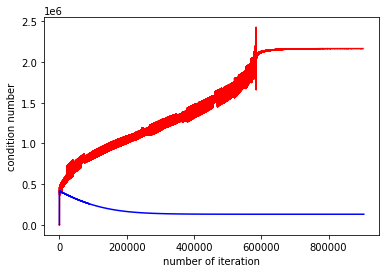

In [44]:
import matplotlib.pyplot as plt
plt.plot(con,label='backtracking without scalling',color='r')
plt.plot(con2,label="backtracking with scalling diagonal",color='b')
plt.xlabel("number of iteration")
plt.ylabel("condition number")
plt.show()

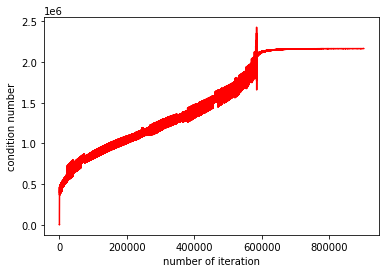

In [45]:
import matplotlib.pyplot as plt
plt.plot(con,label='backtracking without scalling',color='r')
plt.plot(con4,label="backtracking with scalling newton",color='b')
plt.xlabel("number of iteration")
plt.ylabel("condition number")
plt.show()

it is hard to interpret both graph together so i have used both graph saperately

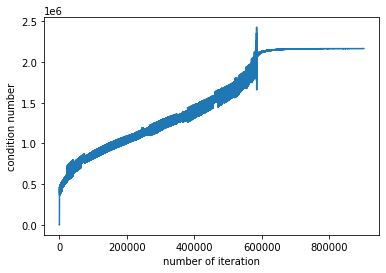

In [46]:
import matplotlib.pyplot as plt
plt.plot(con,label='backtracking without scalling')
#plt.title('Graph of condition number of the Hessian matrix without scaling',fontsize=15)
plt.xlabel("number of iteration")
plt.ylabel("condition number")
plt.show()

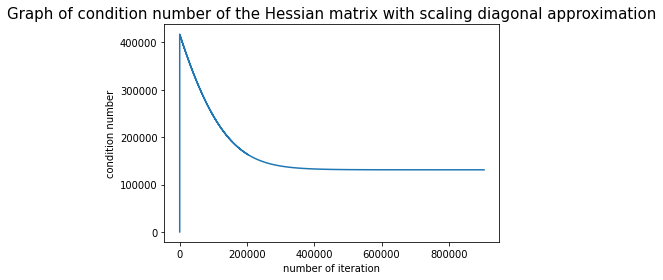

In [47]:
import matplotlib.pyplot as plt
plt.plot(con2,label='backtracking with scalling digonal approximation')
plt.title('Graph of condition number of the Hessian matrix with scaling diagonal approximation',fontsize=15)
plt.xlabel("number of iteration")
plt.ylabel("condition number")
plt.show()

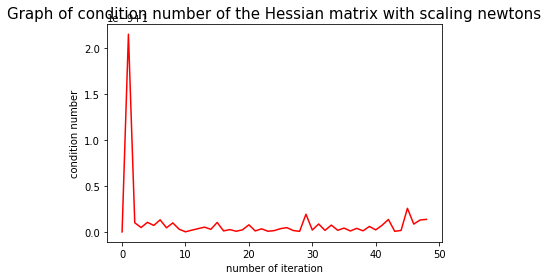

In [57]:
plt.plot(con4,label="backtracking with scalling newtons",color='r')
plt.xlabel("number of iteration")
plt.title('Graph of condition number of the Hessian matrix with scaling newtons',fontsize=15)
plt.ylabel("condition number")
plt.show()

$\huge{observation}$

gradient descent algorithm(without scaling) with backtracking line search

minimizer of function is  [ 3.9999598  15.99967843]

number of iteration taken by algorithm is 902336

minimum function value is  1.615724753450513e-09

gradient descent algorithm(with scaling) with backtracking line search for diagonal d_k

minimizer of function is  [ 4.00000993 16.0000794 ]

number of iteration taken by algorithm is 904703

minimum function value is  9.850897480037126e-11

gradient descent algorithm(with scaling) with backtracking line search for newton method

minimizer of function is  [ 4. 16.]

number of iteration taken by algorithm is 48

minimum function value is  2.373469471365615e-25

as we can see from above  number of iteration taken by newtons method is less compare to another method 
so for this question newtons method is good 

also for newtons method minimizer and minimum function value is exactly equal to true value but for another two method it is not equal

Here, we can see that in without scaling graph the value of condition number increases from 0 to almost $2*10^6$ in 600000 iterations after this the value of condition number become constant while in with scaling in newtons method the value of condition number is oscillate near to 1 since here we got desired condition number so that converge too fast compare to another method


from here we can conclude for any matrix if we got condition number near to  1
convergence rate is fast compare to when we got a larger condition number like in without scaling or scaling with diagonal approximation

for gradient descent algorithm(with scaling) with backtracking line search diagonal approximation condition number is large so rate of convergence is slow 
because of that algorithm take more iteration